Marvel Analysis Project

QUESTIONS: 

What is the relationship between Identity and appearances?

What is the relationship between ALIGNS and Appearances? Do evil characters appear more or good characters?

What is the average amount of appearances before a character dies?

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize': (18, 6)})

In [28]:
df = pd.read_csv('marvel-wikia-data.csv', sep=',', engine='python', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
1,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043,Aug-62,1962
2,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360,Mar-41,1941
3,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061,Oct-74,1974
4,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961,Mar-63,1963


In [29]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
1,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043,Aug-62,1962
2,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360,Mar-41,1941
3,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061,Oct-74,1974
4,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961,Mar-63,1963


In [30]:
col_names = ['page_id', 'name', 'urlslug', 'ID', 'Align', 'Eye',
             'Hair', 'Sex', 'GSM', 'Alive', 'Appearances', 'First Appearance',
             'Year']

In [31]:
df.columns = col_names

df.head()

,page_id,name,urlslug,ID,Align,Eye,Hair,Sex,GSM,Alive,Appearances,First Appearance,Year
0,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
1,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043,Aug-62,1962
2,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360,Mar-41,1941
3,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061,Oct-74,1974
4,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961,Mar-63,1963


In [32]:
df.head()

,page_id,name,urlslug,ID,Align,Eye,Hair,Sex,GSM,Alive,Appearances,First Appearance,Year
0,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
1,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043,Aug-62,1962
2,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360,Mar-41,1941
3,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061,Oct-74,1974
4,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961,Mar-63,1963


In [33]:
df.loc[1]

page_id                                    1678
name                  Spider-Man (Peter Parker)
urlslug             \/Spider-Man_(Peter_Parker)
ID                              Secret Identity
Align                           Good Characters
Eye                                  Hazel Eyes
Hair                                 Brown Hair
Sex                             Male Characters
GSM                                         NaN
Alive                         Living Characters
Appearances                                4043
First Appearance                         Aug-62
Year                                       1962
Name: 1, dtype: object

In [34]:
df.drop(columns = ['page_id', 'urlslug'], axis = 1, inplace = True)

In [35]:
df.head()

,name,ID,Align,Eye,Hair,Sex,GSM,Alive,Appearances,First Appearance,Year
0,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
1,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043,Aug-62,1962
2,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360,Mar-41,1941
3,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061,Oct-74,1974
4,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961,Mar-63,1963


In [36]:
df.drop([0], inplace = True)

In [37]:
df.head()

,name,ID,Align,Eye,Hair,Sex,GSM,Alive,Appearances,First Appearance,Year
1,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043,Aug-62,1962
2,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360,Mar-41,1941
3,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061,Oct-74,1974
4,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961,Mar-63,1963
5,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258,Nov-50,1950


In [38]:
df['Sex'].value_counts()

Male Characters           11638
Female Characters          3837
Agender Characters           45
Genderfluid Characters        2
Name: Sex, dtype: int64

In [39]:
df['GSM'].value_counts()

Homosexual Characters     66
Bisexual Characters       19
Transgender Characters     2
Pansexual Characters       1
Genderfluid Characters     1
Transvestites              1
Name: GSM, dtype: int64

In [14]:
df['ID'].value_counts()

Secret Identity                  6275
Public Identity                  4528
No Dual Identity                 1788
Known to Authorities Identity      15
Name: ID, dtype: int64

In [15]:
df['Alive'].value_counts()

Living Characters      12608
Deceased Characters     3765
Name: Alive, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16376 entries, 1 to 16376
Data columns (total 11 columns):
name                16376 non-null object
ID                  12606 non-null object
Align               13564 non-null object
Eye                 6609 non-null object
Hair                12112 non-null object
Sex                 15522 non-null object
GSM                 90 non-null object
Alive               16373 non-null object
Appearances         15280 non-null object
First Appearance    15561 non-null object
Year                15561 non-null object
dtypes: object(11)
memory usage: 1.5+ MB


In [41]:
df['Appearances'].astype(int)

ValueError: cannot convert float NaN to integer

In [42]:
df.dtypes

name                object
ID                  object
Align               object
Eye                 object
Hair                object
Sex                 object
GSM                 object
Alive               object
Appearances         object
First Appearance    object
Year                object
dtype: object

In [43]:
df['Appearances'] = pd.to_numeric(df['Appearances'])

In [44]:
df['Year'] = pd.to_numeric(df['Year'])

In [45]:
df.dtypes

name                 object
ID                   object
Align                object
Eye                  object
Hair                 object
Sex                  object
GSM                  object
Alive                object
Appearances         float64
First Appearance     object
Year                float64
dtype: object

In [46]:
AB = df['Appearances'].groupby(df['ID']).aggregate(np.sum)

In [48]:
AB

ID
Known to Authorities Identity      1116.0
No Dual Identity                  41215.0
Public Identity                  100208.0
Secret Identity                  102871.0
Name: Appearances, dtype: float64

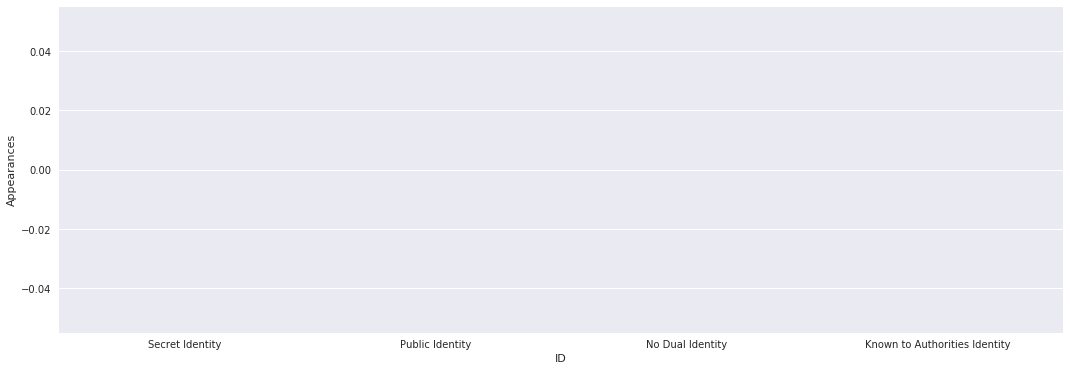

In [59]:
sns.barplot(x= df['ID'], y= df['Appearances'], data = AB)

In [51]:
AC = df['Appearances'].groupby(df['Align']).aggregate(np.sum)

In [52]:
AC

Align
Bad Characters         52910.0
Good Characters       150603.0
Neutral Characters     41091.0
Name: Appearances, dtype: float64

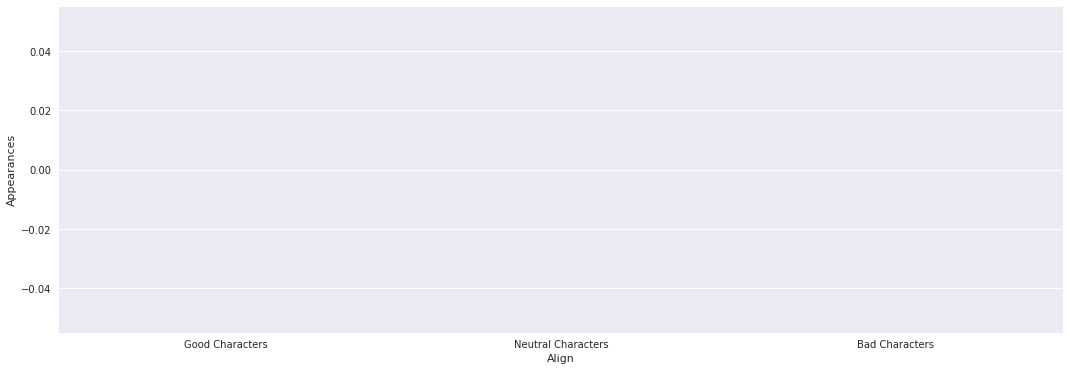

In [58]:
sns.barplot(x= df['Align'], y= df['Appearances'], data = AC)

In [64]:
AD = df['Appearances'].groupby(df['Alive']).aggregate(np.mean)

In [65]:
AD

Alive
Deceased Characters    12.264608
Living Characters      18.500000
Name: Appearances, dtype: float64

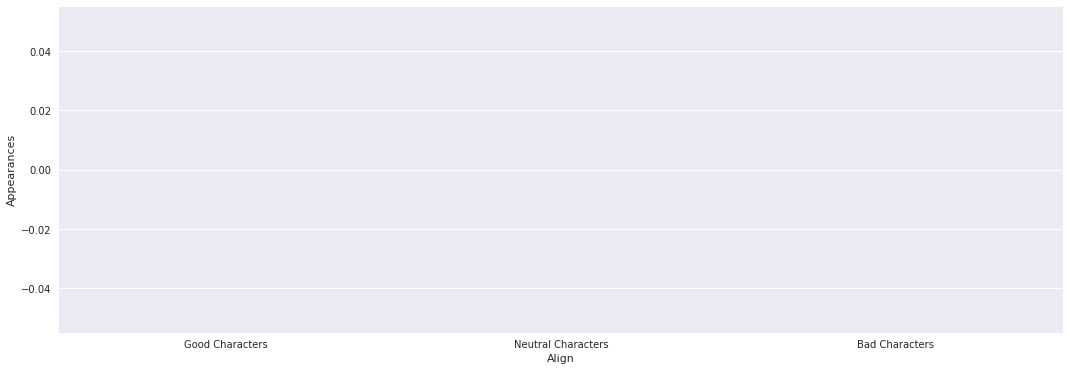

In [66]:
sns.barplot(x= df['Align'], y= df['Appearances'], data = AC)